# Segmenting customers into clusters

Performing Customer Segmentation on the transactional data to build an efficient marketing model.

This is a transactional data set that contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a registered non-store online retail.

**Details about the features**
1. Invoice No: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.
2. StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
3. Description: Product (item) name. Nominal.
4. Quantity: The quantities of each product (item) per transaction. Numeric.
5. Invoice Date: Invoice Date and time. Numeric, the day and time when each transaction was generated.
6. UnitPrice: Unit price. Numeric, Product price per unit in sterling.
7. CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
8. Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# importing the dataset
data = pd.read_excel('F:\\Python\\Clustering(Course 6)\\Project 6-Segmenting customers into clusters\\Project 6-Segmenting customers into clusters-Dataset.xlsx') 

In [3]:
data.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [4]:
# shape of the dataset
data.shape

(541909, 8)

In [5]:
# name of the columns
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [6]:
# checking for missing values
data.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing values are present in Description and CustomerID column.

In [7]:
# unique values of each feature
data.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [8]:
# percentage of missing values
data.isna().sum()/data.shape[0] * 100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [9]:
# subsetting the dataset where Description is missing
data[data['Description'].isna()== True]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


We can safely remove the rows with missing values in Description column because it consists only 0.2 % of the rows.

In [10]:
data = data.dropna(subset=['Description'])

In [11]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

In [12]:
# checking the datatypes of the features
data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [13]:
## extracting new columns from Invoice date

# day of week
data['dayofweek'] = data['InvoiceDate'].dt.weekday

# month of year
data['monthofyear'] = data['InvoiceDate'].dt.month

# day of month
data['dayofmonth'] = data['InvoiceDate'].dt.day

# hour of day
data['hourofday'] = data['InvoiceDate'].dt.hour

In [14]:
# viewing the new features extracted
data[['dayofweek', 'monthofyear','dayofmonth', 'hourofday']].head()

,dayofweek,monthofyear,dayofmonth,hourofday
0,2,12,1,8
1,2,12,1,8
2,2,12,1,8
3,2,12,1,8
4,2,12,1,8


In [15]:
# deleting the InvoiceDate and CustomerID features because the they dont provide any valuable insight anymore
data = data.drop(['InvoiceDate', 'CustomerID'], axis=1)

In [16]:
data['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
C552765       1
556684        1
C542097       1
556687        1
C575638       1
Name: InvoiceNo, Length: 24446, dtype: int64

The code starting with the letter 'C' indicates a cancellation.

In [17]:
# tranforming the feature InvoiceNo into str datatype
data['InvoiceNo'] = data['InvoiceNo'].astype('str')

In [18]:
# rows with cancelled InvoiceNo
data[(data['InvoiceNo'].str.startswith('C'))]

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,dayofweek,monthofyear,dayofmonth,hourofday
141,C536379,D,Discount,-1,27.50,United Kingdom,2,12,1,9
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,4.65,United Kingdom,2,12,1,9
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,1.65,United Kingdom,2,12,1,10
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,0.29,United Kingdom,2,12,1,10
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,0.29,United Kingdom,2,12,1,10
...,...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,0.83,United Kingdom,4,12,9,9
541541,C581499,M,Manual,-1,224.69,United Kingdom,4,12,9,10
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,10.95,United Kingdom,4,12,9,11
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,1.25,United Kingdom,4,12,9,11


In [19]:
# creating a new feature with value 1 for cancelled InvoiceNo
data['Cancelled'] = 1*(data['InvoiceNo'].str.startswith('C'))

In [20]:
# removing the InvoiceNo feature
data = data.drop(['InvoiceNo'], axis=1)

In [21]:
# rows with UnitPrice less than equal to 0
data[data.UnitPrice.values <=0]

,StockCode,Description,Quantity,UnitPrice,Country,dayofweek,monthofyear,dayofmonth,hourofday,Cancelled
6391,22734,amazon,20,0.0,United Kingdom,4,12,3,12,0
6392,22139,amazon,15,0.0,United Kingdom,4,12,3,12,0
7313,21275,?,-30,0.0,United Kingdom,4,12,3,16,0
9302,22841,ROUND CAKE TIN VINTAGE GREEN,1,0.0,Germany,6,12,5,14,0
13217,84968F,check,-20,0.0,United Kingdom,0,12,6,15,0
...,...,...,...,...,...,...,...,...,...,...
535336,22576,check,-30,0.0,United Kingdom,2,12,7,18,0
536908,23090,missing,-338,0.0,United Kingdom,3,12,8,9,0
538504,46000M,POLYESTER FILLER PAD 45x45cm,240,0.0,United Kingdom,3,12,8,13,0
538505,46000S,POLYESTER FILLER PAD 40x40cm,300,0.0,United Kingdom,3,12,8,13,0


In [22]:
# value counts of the Description column of the above subset
data[data.UnitPrice.values <=0]['Description'].value_counts()

check                                  159
?                                       47
damages                                 45
damaged                                 43
found                                   25
                                      ... 
TV DINNER TRAY DOLLY GIRL                1
did  a credit  and did not tick ret      1
20713                                    1
RED RETROSPOT SUGAR JAM BOWL             1
GROW YOUR OWN PLANT IN A CAN             1
Name: Description, Length: 377, dtype: int64

Only 1063 rows are with UnitPrice less than equal to 0.
This subset consists of damaged, missing, unknown, etc. values in Description.

In [23]:
# removing rows with UnitPrice less than equal to 0
data = data.drop(data[data.UnitPrice.values <=0].index)

In [24]:
# Other miscellaneous StockCode
data[data['StockCode'].str.len() < 5]

,StockCode,Description,Quantity,UnitPrice,Country,dayofweek,monthofyear,dayofmonth,hourofday,Cancelled
45,POST,POSTAGE,3,18.00,France,2,12,1,8,0
141,D,Discount,-1,27.50,United Kingdom,2,12,1,9,1
386,POST,POSTAGE,1,15.00,Netherlands,2,12,1,11,0
1123,POST,POSTAGE,1,18.00,Germany,2,12,1,13,0
1423,C2,CARRIAGE,1,50.00,EIRE,2,12,1,14,0
...,...,...,...,...,...,...,...,...,...,...
541540,DOT,DOTCOM POSTAGE,1,1714.17,United Kingdom,4,12,9,10,0
541541,M,Manual,-1,224.69,United Kingdom,4,12,9,10,1
541730,POST,POSTAGE,1,18.00,Germany,4,12,9,11,0
541767,POST,POSTAGE,2,18.00,Germany,4,12,9,12,0


In [25]:
data[data['StockCode'].str.len() < 5]['Description'].value_counts()

POSTAGE                       1252
DOTCOM POSTAGE                 707
Manual                         566
CARRIAGE                       143
Discount                        77
SAMPLES                         63
CRUK Commission                 16
PADS TO MATCH ALL CUSHIONS       3
Adjust bad debt                  1
Name: Description, dtype: int64

In [26]:
# Removing the above subset of rows
data = data.drop(data[data['StockCode'].str.len() < 5].index)

In [27]:
# removing Description and StockCode feature
data = data.drop(['Description', 'StockCode'], axis=1)

In [28]:
# encoding the feature Country
country = pd.get_dummies(data['Country'] , prefix = 'Country')
data = pd.concat([data , country] , axis = 1)

In [29]:
# removing the Country feature
data = data.drop(['Country'], axis=1)

In [30]:
data.describe()

,Quantity,UnitPrice,dayofweek,monthofyear,dayofmonth,hourofday,Cancelled,Country_Australia,Country_Austria,Country_Bahrain,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
count,536564.000000,536564.000000,536564.000000,536564.000000,536564.000000,536564.000000,536564.000000,536564.000000,536564.000000,536564.000000,...,536564.000000,536564.000000,536564.000000,536564.000000,536564.000000,536564.000000,536564.000000,536564.000000,536564.000000,536564.000000
mean,9.887096,3.762806,2.434358,7.558552,15.015219,13.078298,0.016328,0.002337,0.000721,0.000035,...,0.000106,0.000019,0.000401,0.004598,0.000814,0.003668,0.000542,0.000125,0.915956,0.000831
std,215.940566,68.825205,1.847324,3.508981,8.661129,2.443118,0.126734,0.048287,0.026847,0.005951,...,0.010306,0.004317,0.020013,0.067651,0.028527,0.060451,0.023282,0.011174,0.277454,0.028819
min,-80995.000000,0.001000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.250000,1.000000,5.000000,7.000000,11.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.000000,2.080000,2.000000,8.000000,15.000000,13.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,10.000000,4.130000,4.000000,11.000000,22.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,80995.000000,17836.460000,6.000000,12.000000,31.000000,20.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Performing K means Clustering

In [31]:
# importing the library
from sklearn.cluster import KMeans

In [32]:
x = data

In [33]:
# normalizing the variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [34]:
# creating an instance of KMeans
kmeans = KMeans()

In [35]:
kmeans.fit(x_scaled)

KMeans()

In [36]:
# predictions of clusters
pred = kmeans.predict(x_scaled)

In [37]:
# value counts of each cluster
pd.Series(pred).value_counts()

2    287016
0    204506
5     31737
4      9095
3      2467
7      1059
1       387
6       297
dtype: int64

In [38]:
# evaluation metric
kmeans.inertia_

20016380.08104859

### Choosing an optimum value of k

In [50]:
# empty list for storing the inertia values
SSE = []

In [51]:
# making clusters from range 1 to 20 and then calculating their inertia value
for cluster in range(1,20):
    kmeans = KMeans(n_clusters=cluster)
    kmeans.fit(x_scaled)
    SSE.append(kmeans.inertia_)

In [52]:
SSE

[24145379.999998398,
 23103388.065349262,
 22558904.017780785,
 22021833.81501641,
 21633926.705578808,
 21092300.936887164,
 20413030.8352483,
 20018026.53280289,
 19473935.140029315,
 18933792.851387,
 18395508.976780254,
 17859562.590471655,
 17452434.876292113,
 16784779.35909128,
 16246829.756960643,
 15648954.397020899,
 15095909.805816336,
 14699000.956071218,
 14098279.025997479]

In [53]:
frame = pd.DataFrame({'Cluster':range(1,20),
                     'SSE':SSE})

Text(0, 0.5, 'Inertia')

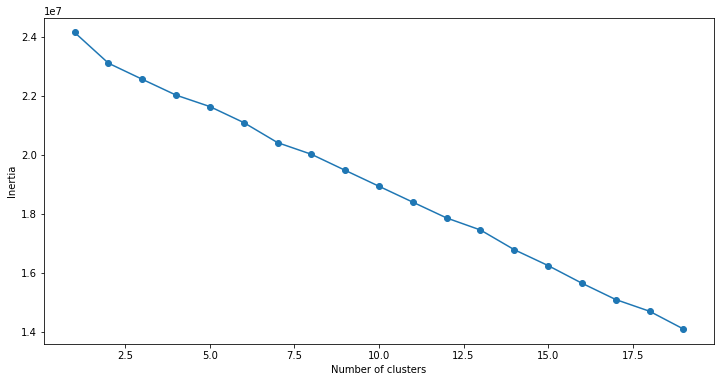

In [54]:
# plotting the elbow curve
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

The optimum number of cluster is 7.

In [80]:
# creating an instance of KMeans with 7 cluster
kmeans = KMeans(n_clusters=7)

In [81]:
kmeans.fit(x_scaled)

KMeans(n_clusters=7)

In [82]:
# predictions of clusters
pred = kmeans.predict(x_scaled)

In [83]:
# value counts of each clusters
pd.Series(pred).value_counts()

0    247561
1    243960
6     40989
4      2328
2      1059
3       387
5       280
dtype: int64

In [84]:
# evaluation metric
kmeans.inertia_

20568794.906448614